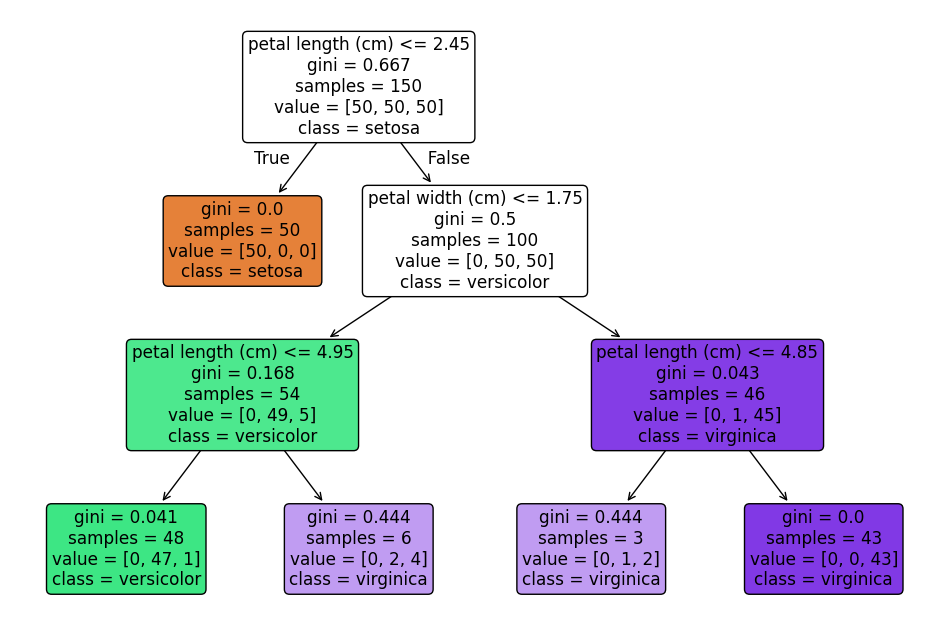

In [5]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target
feature_names = iris.feature_names
class_names = iris.target_names

# Train Decision Tree
dt_clf = DecisionTreeClassifier(random_state=42, max_depth=3)
dt_clf.fit(X, y)

# Plot the tree
plt.figure(figsize=(12, 8))
plot_tree(dt_clf, feature_names=feature_names, class_names=class_names,
          filled=True, rounded=True)
plt.show()


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Overfitting example (deep tree)
dt_overfit = DecisionTreeClassifier(random_state=42)
dt_overfit.fit(X_train, y_train)
print("Overfit Tree Accuracy:")
print("Train:", accuracy_score(y_train, dt_overfit.predict(X_train)))
print("Test :", accuracy_score(y_test, dt_overfit.predict(X_test)))

# Controlled depth
dt_pruned = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_pruned.fit(X_train, y_train)
print("\nPruned Tree Accuracy:")
print("Train:", accuracy_score(y_train, dt_pruned.predict(X_train)))
print("Test :", accuracy_score(y_test, dt_pruned.predict(X_test)))


Overfit Tree Accuracy:
Train: 1.0
Test : 1.0

Pruned Tree Accuracy:
Train: 0.9523809523809523
Test : 1.0


In [7]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

print("\nRandom Forest Accuracy:")
print("Train:", accuracy_score(y_train, rf_clf.predict(X_train)))
print("Test :", accuracy_score(y_test, rf_clf.predict(X_test)))



Random Forest Accuracy:
Train: 1.0
Test : 1.0


In [8]:
import pandas as pd

# Get feature importance
importances = rf_clf.feature_importances_
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
print(importance_df.sort_values(by="Importance", ascending=False))


             Feature  Importance
3   petal width (cm)    0.433982
2  petal length (cm)    0.417308
0  sepal length (cm)    0.104105
1   sepal width (cm)    0.044605


In [9]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Decision Tree
cv_scores_dt = cross_val_score(dt_pruned, X, y, cv=5)
print("\nDecision Tree CV Accuracy:", cv_scores_dt.mean())

# Cross-validation for Random Forest
cv_scores_rf = cross_val_score(rf_clf, X, y, cv=5)
print("Random Forest CV Accuracy:", cv_scores_rf.mean())



Decision Tree CV Accuracy: 0.9733333333333334
Random Forest CV Accuracy: 0.9666666666666668
